In [267]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [268]:
df=pd.read_csv("Customer-Churn.csv")

In [269]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [270]:
df.drop(columns=["customerID"],axis=1,inplace=True)

In [271]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [272]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [273]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [274]:
for i in df.columns:
  if df[i].dtype=="O":
    print(df[i].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [275]:
df.replace("No internet service","No",inplace=True)
df.replace("No phone service","No",inplace=True)

In [276]:
for i in df.columns:
  if df[i].dtype=="O":
    print(df[i].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [277]:
for i in df.columns:
  if df[i].dtype=="O" and "Yes" in df[i].unique():
    df[i]=df[i].apply(lambda x:1 if x=="Yes" else 0)

In [278]:
for i in df.columns:
  if df[i].dtype=="O":
    print(i,df[i].unique())

gender ['Female' 'Male']
InternetService ['DSL' 'Fiber optic' 'No']
Contract ['Month-to-month' 'One year' 'Two year']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [279]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",0).astype(float)

In [280]:
for i in df.columns:
  if df[i].dtype=="O":
    print(i,df[i].unique())

gender ['Female' 'Male']
InternetService ['DSL' 'Fiber optic' 'No']
Contract ['Month-to-month' 'One year' 'Two year']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [281]:
df["gender"]=df["gender"].apply(lambda x:0 if x=="Female" else 1)

In [282]:
df["gender"].value_counts()

gender
1    3555
0    3488
Name: count, dtype: int64

In [283]:
for i in df.columns:
  if df[i].dtype=="O":
    print(i,df[i].unique())

InternetService ['DSL' 'Fiber optic' 'No']
Contract ['Month-to-month' 'One year' 'Two year']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [284]:
pd.get_dummies(data=df,columns=["InternetService","Contract","PaymentMethod"],dtype=int).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

In [285]:
Final_df=pd.get_dummies(data=df,columns=["InternetService","Contract","PaymentMethod"],dtype=int)

In [286]:
Final_df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1


In [287]:
Final_df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [288]:
Final_df_0=Final_df[Final_df["Churn"]==0]
Final_df_1=Final_df[Final_df["Churn"]==1].sample(Final_df_0.shape[0],replace=True)

In [289]:
Final_df_0.shape

(5174, 27)

In [290]:
Final_df_1.shape

(5174, 27)

In [291]:
final_df=pd.concat([Final_df_0,Final_df_1],axis=0)

In [292]:
final_df["Churn"].value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

In [293]:
x=final_df.drop("Churn",axis=1)
y=final_df["Churn"]

In [294]:
x.shape

(10348, 26)

In [295]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [296]:
y_train.value_counts()

Churn
1    4139
0    4139
Name: count, dtype: int64

In [297]:
y_test.value_counts()

Churn
0    1035
1    1035
Name: count, dtype: int64

In [298]:
scaling=StandardScaler()

In [299]:
X_train_scaled=scaling.fit_transform(X_train)
x_test_scaled=scaling.transform(X_test)

In [300]:
X_train_scaled.shape

(8278, 26)

In [301]:
X_train_scaled[:5]

array([[ 0.99662324,  2.0589416 ,  1.11424326,  1.68350304,  0.53952131,
         0.32594603,  1.14527062, -0.57595536,  1.40935854,  1.44089551,
         1.72123838,  1.21469275,  1.20258783,  0.74527196,  1.5236201 ,
         1.12600929, -0.67498185,  0.962761  , -0.44941599, -1.37710968,
         2.19483198, -0.45793378, -0.49648668, -0.47883633,  1.2046942 ,
        -0.512128  ],
       [ 0.99662324, -0.48568643,  1.11424326,  1.68350304, -0.62237343,
         0.32594603,  1.14527062, -0.57595536, -0.70954266, -0.69401285,
        -0.58097705, -0.82325345, -0.83154009,  0.74527196,  0.22435782,
        -0.53232402, -0.67498185,  0.962761  , -0.44941599,  0.72615857,
        -0.45561574, -0.45793378, -0.49648668,  2.08839627, -0.83008617,
        -0.512128  ],
       [ 0.99662324, -0.48568643,  1.11424326,  1.68350304,  0.78849876,
         0.32594603,  1.14527062, -0.57595536, -0.70954266, -0.69401285,
        -0.58097705, -0.82325345, -0.83154009, -1.34179207, -1.50049503,
       

In [302]:
model=keras.models.Sequential([
    keras.layers.Dense(300,activation="relu",input_shape=(26,)),
    keras.layers.Dense(200,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(50,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
    ])
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [303]:
model.fit(X_train_scaled,y_train,epochs=50)

Epoch 1/50
259/259 [==============================] - 3s 4ms/step - loss: 0.5003 - accuracy: 0.7540
Epoch 2/50
259/259 [==============================] - 1s 4ms/step - loss: 0.4745 - accuracy: 0.7713
Epoch 3/50
259/259 [==============================] - 1s 4ms/step - loss: 0.4545 - accuracy: 0.7851
Epoch 4/50
259/259 [==============================] - 1s 4ms/step - loss: 0.4358 - accuracy: 0.7986
Epoch 5/50
259/259 [==============================] - 1s 4ms/step - loss: 0.4110 - accuracy: 0.8095
Epoch 6/50
259/259 [==============================] - 1s 4ms/step - loss: 0.3856 - accuracy: 0.8257
Epoch 7/50
259/259 [==============================] - 1s 4ms/step - loss: 0.3636 - accuracy: 0.8428
Epoch 8/50
259/259 [==============================] - 1s 4ms/step - loss: 0.3375 - accuracy: 0.8521
Epoch 9/50
259/259 [==============================] - 1s 4ms/step - loss: 0.3153 - accuracy: 0.8637
Epoch 10/50
259/259 [==============================] - 2s 6ms/step - loss: 0.2950 - accuracy: 0.8726

In [304]:
model.evaluate(x_test_scaled,y_test)

65/65 [==============================] - 0s 4ms/step - loss: 0.7605 - accuracy: 0.8710


[0.7604725956916809, 0.8710144758224487]

In [305]:
y_pred=model.predict(x_test_scaled).reshape(-1,)
y_pred=[1 if i>0.5 else 0 for i in y_pred]

65/65 [==============================] - 0s 2ms/step


In [306]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

In [307]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1035
           1       0.82      0.94      0.88      1035

    accuracy                           0.87      2070
   macro avg       0.88      0.87      0.87      2070
weighted avg       0.88      0.87      0.87      2070



<Axes: >

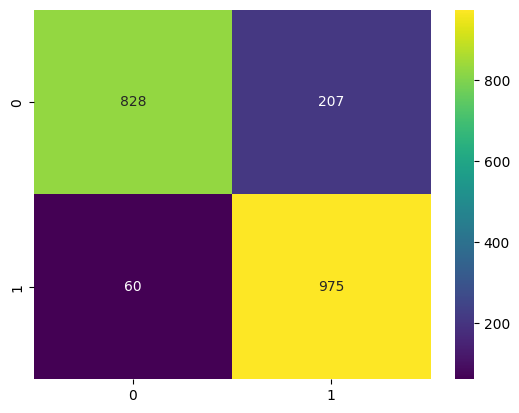

In [308]:
sns.heatmap(confusion_matrix(y_test,y_pred),fmt="d",annot=True,cmap="viridis")